In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
import numpy as np
%matplotlib inline



def safe_listdir(path):
    f  = os.listdir(path)
    try:
        f.remove('.DS_Store')
    except ValueError:
        pass
    return f

In [2]:
DATA_PATH = '../data/2_level_data'
label_lv1 = safe_listdir(DATA_PATH)

label_lv2 = []
sample_cnt = []
for l in label_lv1:
    sub_l = safe_listdir(DATA_PATH + '/%s/' % l)
    
    for sl in sub_l:
        imgs = safe_listdir(DATA_PATH + '/%s/%s' % (l, sl))
        sample_cnt.append(len(imgs))
    label_lv2.extend(sub_l)
    # print('%s :\n' % l)
    # print(sub_l, '\n\n\n')
    
print(len(label_lv1), len(label_lv2), sum(sample_cnt))

23 121 30336


count     121.000000
mean      250.710744
std       338.852216
min         9.000000
25%        49.000000
50%       114.000000
75%       352.000000
max      1979.000000
dtype: float64

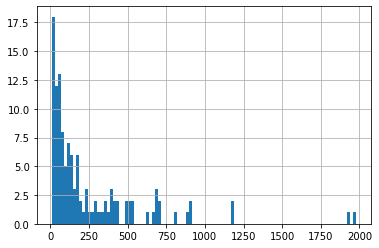

In [3]:
samples_hist = pd.Series(sample_cnt, index=label_lv2)
samples_hist.hist(bins=100)
samples_hist.describe()

In [62]:
samples_hist[samples_hist<20]

hydromedusae_other                       12
hydromedusae_typeE                       14
ephyra                                   14
appendicularian_fritillaridae            16
heteropod                                10
invertebrate_larvae_other_A              14
hydromedusae_haliscera_small_sideview     9
hydromedusae_liriope                     19
pteropod_theco_dev_seq                   13
acantharia_protist_big_center            13
fish_larvae_very_thin_body               16
fish_larvae_deep_body                    10
dtype: int64

In [78]:
DATA_PATH = '../data/raw_data/train'
image_sizes = []
for c in os.listdir(DATA_PATH):
    for f in os.listdir(DATA_PATH+ '/%s'%c):
        img = io.imread(DATA_PATH + '/%s/%s'%(c, f))
        image_sizes.append(img.shape)

In [79]:
print(len(image_sizes))

30336


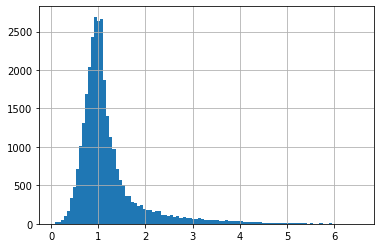

In [82]:
image_sizes = np.array(image_sizes)
w_h_ratio = pd.Series(image_sizes[:, 1]/image_sizes[:, 0])
w_h_ratio.hist(bins=100)

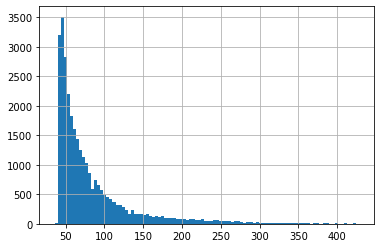

In [85]:
w_h_max = pd.Series(image_sizes.max(axis=1))
w_h_max.hist(bins=100)

In [86]:
import pickle
with open('../output/image_sizes.pkl', 'wb') as f:
    pickle.dump(image_sizes, f)
